# 1번 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv

weather = pd.read_csv("weather.csv", index_col = 0)

print(weather.head(3))
print(weather.tail(3))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88955  100 88955    0     0  44236      0  0:00:02  0:00:02 --:--:-- 44256
curl: (6) Could not resolve host: weather.csv
            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


# 2번 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오

In [2]:
date = '2015-06-06'
data_on_date = weather.loc[date]
print(data_on_date)

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


# 3번 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [3]:
hottest_date = weather['평균 기온'].idxmax()
hottest_day_data = weather.loc[hottest_date]

print(hottest_date, '\n', hottest_day_data)

2013-08-08 
 평균 기온    31.3
최대 풍속     7.8
평균 풍속     4.6
Name: 2013-08-08, dtype: float64


# 4번 "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [4]:
hot_days = weather[weather['평균 기온'] > 30]

print(hot_days)

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


# 5번 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

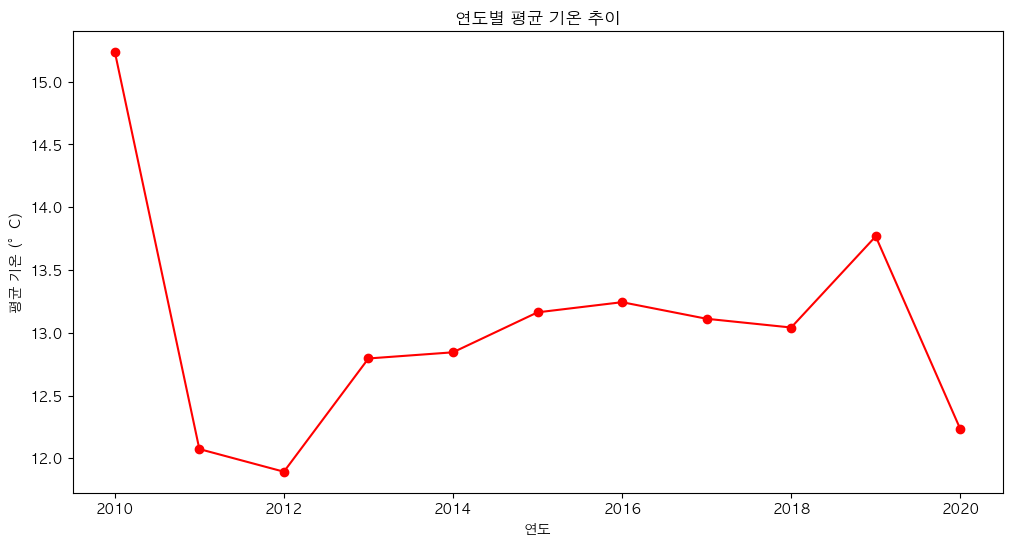

In [5]:
import matplotlib.font_manager as fm
# 맥OS사용중이라 아래와같이 폰트를 설정했습니다.
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

weather.index = pd.to_datetime(weather.index)
yearly_avg_temp = weather['평균 기온'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index.year, yearly_avg_temp, marker='o', linestyle='-', color='r')
plt.title('연도별 평균 기온 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온 (°C)')
plt.show()

# 6번 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

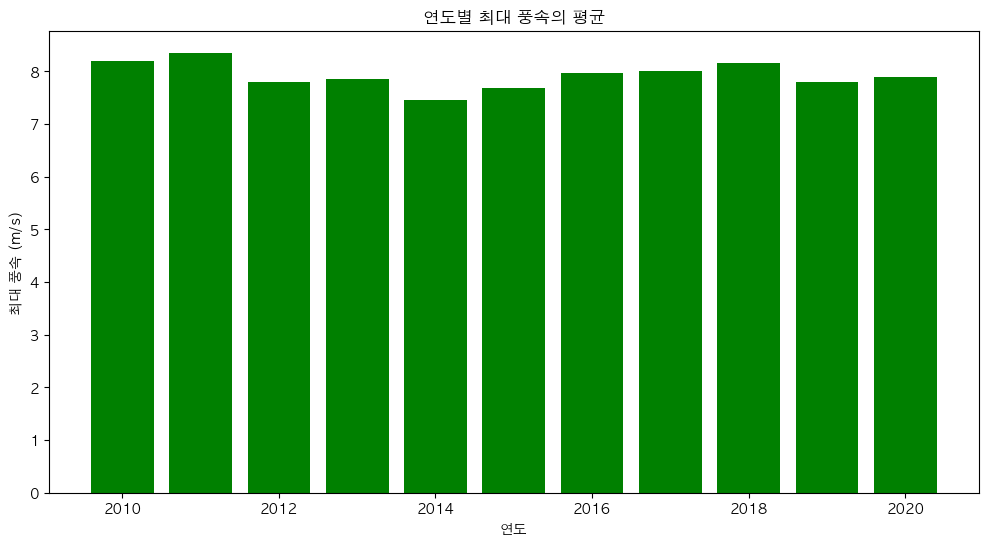

In [6]:
yearly_max_wind = weather['최대 풍속'].resample('Y').mean()

plt.figure(figsize=(12, 6))
plt.bar(yearly_max_wind.index.year, yearly_max_wind, color='g')
plt.title('연도별 최대 풍속의 평균')
plt.xlabel('연도')
plt.ylabel('최대 풍속 (m/s)')
plt.show()

# 7번 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오

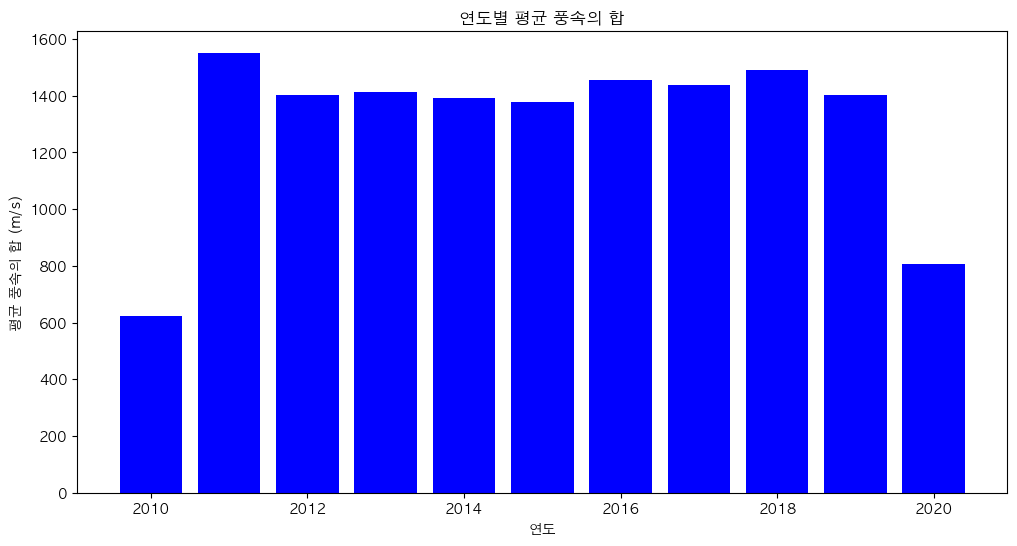

In [7]:
yearly_sum_avg_wind = weather['평균 풍속'].resample('Y').sum()

plt.figure(figsize=(12, 6))
plt.bar(yearly_sum_avg_wind.index.year, yearly_sum_avg_wind, color='b')
plt.title('연도별 평균 풍속의 합')
plt.xlabel('연도')
plt.ylabel('평균 풍속의 합 (m/s)')
plt.show()

# 8번 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [8]:
avg_temp_2015 = round(weather['평균 기온']['2015'].mean(), 2)
avg_temp_2016 = round(weather['평균 기온']['2016'].mean(), 2)

if avg_temp_2015 > avg_temp_2016:
    print('2015년이 더 더웠습니다.')
    print(avg_temp_2015)
else:
    print('2016년이 더 더웠습니다.')
    print(avg_temp_2016)


2016년이 더 더웠습니다.
13.24


# 9번 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [18]:
weather.index = pd.to_datetime(weather.index)

weather['월'] = weather.index.month

monthly_avg_temp_sum = weather.groupby('월')['평균 기온'].sum()

min_temp_month = monthly_avg_temp_sum.idxmin()
max_temp_month = monthly_avg_temp_sum.idxmax()

min_temp_month, max_temp_month, monthly_avg_temp_sum[min_temp_month], monthly_avg_temp_sum[max_temp_month]
print(f"평균 기온의 합이 가장 많은 달 : {max_temp_month}")
print(f"퍙군 기온의 합 : {monthly_avg_temp_sum[max_temp_month]}")
print(f"평균 기온의 합이 가장 적은 달 : {min_temp_month}")
print(f"평균 기온의 합 : {monthly_avg_temp_sum[min_temp_month]}")

평균 기온의 합이 가장 많은 달 : 8
퍙군 기온의 합 : 7672.1
평균 기온의 합이 가장 적은 달 : 1
평균 기온의 합 : 495.5


# 10번 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [21]:
weather['년'] = weather.index.year

yearly_wind_sum = weather.groupby('년')['최대 풍속'].sum()

max_wind_year = yearly_wind_sum.idxmax()
print(f"평균 풍속이 가장 큰 해는 {max_wind_year}년")

평균 풍속이 가장 큰 해는 2011년
